# Inroduction

**In this file, we will work with a data that provides different columns such as data, the price of recruitment 'that the client pays', cost of supplier 'that the office had to pay to a third party in order to recruit the maid', and finally the profit. We will analyze the dataframe to show mean profit for each country and also for a given month**

## Import packages

In [204]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

# 1st step: cleaning data, EDA, and feature engineering

In [205]:
# read in the data
profit_df = pd.read_excel('datasets/Estimated profits of recuriments requests.xlsx')

In [206]:
# print the head of our data
profit_df.head(2)

,Serial,Request information,Added date,Client name,The Price Of Recruitment,Cost of supplier,Profit
0,1.0,1 (Closed) - Domestic worker,2018-05-06 | 21-08-1439,1 / HESA SALEH ALAMERY,11000.0,0.0,11000.0
1,NaN,Bangladesh - Ready - Muslim,NaN,NaN,NaN,NaN,NaN


#### remove spaces from the columns and replace them with _ symbol

In [207]:
# clean column names: convert them to lowercase and replace any space with the symbol _ for easy access to the column
profit_df.columns = profit_df.columns.str.lower()
profit_df.columns = profit_df.columns.str.replace(' ', '_')

### Since the odd rows have a single value, we'll concat that value to the first column of the even rows

In [208]:
# iterate through the first half of the dataframe
for i in range(int(len(profit_df)/2)):
    # assign the value of the even row with the value of the odd row to the even rows
    # it is kinda aggregation
    profit_df.iloc[i*2,1] = profit_df.iloc[i*2,1] + profit_df.iloc[(i*2)+1,1]

In [209]:
# print the head of our data after cleaning column names
profit_df.head(2)

,serial,request_information,added_date,client_name,the_price_of_recruitment,cost_of_supplier,profit
0,1.0,1 (Closed) - Domestic worker Bangladesh - Read...,2018-05-06 | 21-08-1439,1 / HESA SALEH ALAMERY,11000.0,0.0,11000.0
1,NaN,Bangladesh - Ready - Muslim,NaN,NaN,NaN,NaN,NaN


### **NOTE: When the profit is 0, then that means it's an alternative maid

In [210]:
# create a mask which returns a indices when they're even or 0  
index_mask = pd.Series(profit_df.index.values).apply(lambda index: index == 0 or index % 2 == 0)
# reassign the dataframe with the evevn rows
profit_df = profit_df.loc[index_mask]

In [211]:
# reset index
profit_df.reset_index(inplace=True, drop=True)
# print the head
profit_df.head(2)

,serial,request_information,added_date,client_name,the_price_of_recruitment,cost_of_supplier,profit
0,1.0,1 (Closed) - Domestic worker Bangladesh - Read...,2018-05-06 | 21-08-1439,1 / HESA SALEH ALAMERY,11000.0,0.0,11000.0
1,2.0,2 (Closed) - Domestic worker Bangladesh - Read...,2018-05-06 | 21-08-1439,2 / ALHANOF OBAID ALOMARY,11000.0,7400.0,3600.0


### feature engineering

In [212]:
# extract country from request_information column
def extract_country(value):
    # check if the column has the country name not sri lanka
    if len(value.split('-')[1].split()) < 4:
        # return the last value in the list which would be the country
        return ''.join(value.split('-')[1].split()[-1])
    # if the country is located in two indices, then return the last two indices
    elif len(value.split('-')[1].split()) == 4:
        return ''.join(value.split('-')[1].split()[-2:])
# create a new column that would hold the country value and use apply to use the function above
profit_df['country'] = profit_df['request_information'].apply(extract_country)

In [213]:
# create another column which would have the percentage of the profit 
# profit_df['profit_percentage'] =  (profit_df['profit'] - (profit_df['cost_of_supplier']) / profit_df['profit'] )

In [214]:
profit_df.head(3)

,serial,request_information,added_date,client_name,the_price_of_recruitment,cost_of_supplier,profit,country
0,1.0,1 (Closed) - Domestic worker Bangladesh - Read...,2018-05-06 | 21-08-1439,1 / HESA SALEH ALAMERY,11000.0,0.0,11000.0,Bangladesh
1,2.0,2 (Closed) - Domestic worker Bangladesh - Read...,2018-05-06 | 21-08-1439,2 / ALHANOF OBAID ALOMARY,11000.0,7400.0,3600.0,Bangladesh
2,3.0,3 (Closed) - Domestic worker Bangladesh - Read...,2018-05-07 | 22-08-1439,3 / SHEYHA FAHAD ALDOSARY,11000.0,0.0,11000.0,Bangladesh


# Extract date by months

In [215]:
# extract date form the added_date column
def extraxt_date(value):
    return value.split('|')[0]
profit_df['date'] = pd.to_datetime(profit_df.added_date.apply(extraxt_date))

In [216]:
profit_df['month'] = pd.DatetimeIndex(profit_df['date']).month

In [217]:
# check how many month do we have
profit_df.month.value_counts()

5     121
7      55
9      45
8      35
10     34
6      25
11     20
12      5
1       1
Name: month, dtype: int64

In [218]:
# look at the number of our classes 'country in the data'
profit_df.country.value_counts()

SriLanka       179
Bangladesh      80
Philippines     62
Indian          20
Name: country, dtype: int64

# Visualization

## Show the percentage of each country in our data

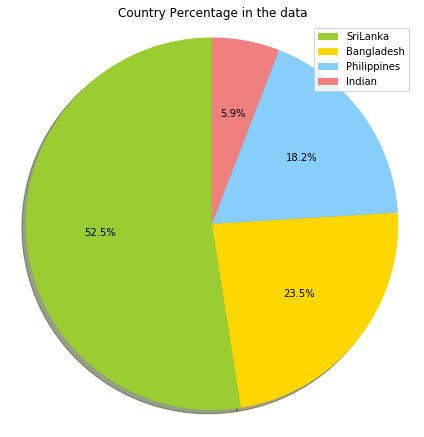

In [219]:
# set colour
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
# set figure size
plt.figure(figsize=(6, 6));
# plot the chart
plt.pie(profit_df.country.value_counts().values, colors=colors, shadow=True, startangle=90, autopct='%.1f%%')
# set legend
plt.legend(profit_df.country.value_counts().index.tolist(), loc="best")
# set the chart to be in the midlle
plt.axis('equal')
plt.tight_layout()
# set title
plt.title('Country Percentage in the data')
plt.savefig('Country_Percentage_in_the_data.png')
# show the plot
plt.show();

# check the profit in a given month

In [220]:
month = 8
df_in_a_month = profit_df[profit_df.month == month]
# create a dataframe of the mean of of all numeric values for all countries grouped by months and countries
df_month_mean = df_in_a_month.iloc[:, 1:].groupby(['month']).mean()
# print the average dataframe
df_month_mean

,the_price_of_recruitment,cost_of_supplier,profit
month,,,
8,12985.714286,10888.885714,2096.857143


In [221]:
# whole income in the given month ** Note it is not the profit dropping India since we don't have it the other data.
df_drop_india = df_in_a_month[df_in_a_month['country'] != 'Indian']
df_drop_india['the_price_of_recruitment'].sum()

446500.0

In [222]:
df_drop_india.groupby('country')['the_price_of_recruitment'].mean()

country
Bangladesh      7333.333333
Philippines    16250.000000
SriLanka       15630.434783
Name: the_price_of_recruitment, dtype: float64

In [223]:
predicted_countries_income = pd.DataFrame(data=[[80663,  325000, 359508]], 
                                          columns=['Bangladesh', 'Philippines', 'SriLanka'])

In [224]:
predicted_countries_income

,Bangladesh,Philippines,SriLanka
0,80663,325000,359508


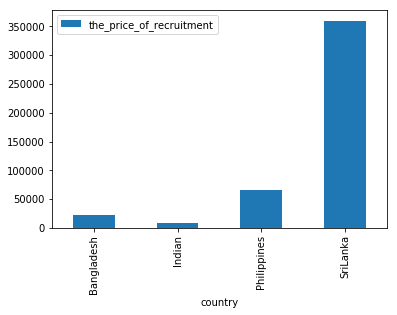

In [225]:
# show the sum of the income per country in a given month
pd.DataFrame(df_in_a_month.groupby('country')['the_price_of_recruitment'].sum()).plot(kind='bar')
plt.savefig('sum_of_profit_in_a_month.png')

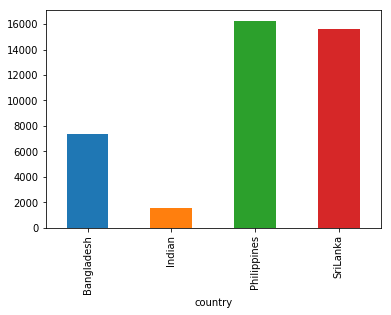

In [226]:
# show the mean income per country in a given month
df_in_a_month.groupby('country')['the_price_of_recruitment'].mean().plot(kind='bar')
plt.savefig('mean_of_mean_in_a_month.png')

In [227]:
# number of requests in a given month
len(df_in_a_month)

35

## Visualization of the percentage of each country requests in a given month

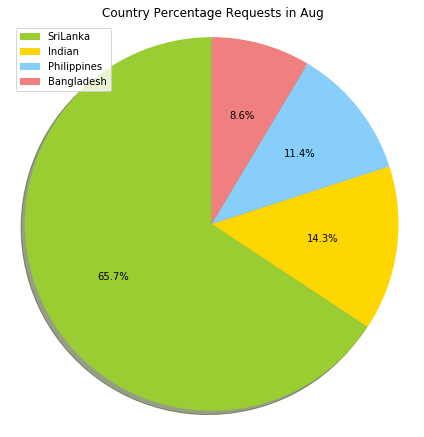

In [228]:
# set color
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
# set figure size
plt.figure(figsize=(6, 6));
# plot the chart
plt.pie(df_in_a_month.country.value_counts().values, colors=colors, shadow=True, startangle=90, autopct='%.1f%%')
# set legend
plt.legend(df_in_a_month.country.value_counts().index.tolist(), loc="best")
# set the chart to be in the middle
plt.axis('equal')
plt.tight_layout()
# set chart title
plt.title('Country Percentage Requests in Aug')
plt.savefig('Country_Percentage_Requests_in_Aug.png')
# show the plot
plt.show();

In [229]:
# create a dataframe of the mean of of all numeric values for all countries grouped by months and countries
df_mean = profit_df.iloc[:, 1:-2].groupby(['country']).mean()
# print the average dataframe
df_mean

,the_price_of_recruitment,cost_of_supplier,profit
country,,,
Bangladesh,9725.000000,6303.750000,3421.250000
Indian,1735.000000,223.600000,1511.400000
Philippines,14735.483871,9677.935484,5057.548387
SriLanka,17010.279330,12084.173184,4926.206704


## Visualization of the profit, cost of supplier, cot of the client in a given month

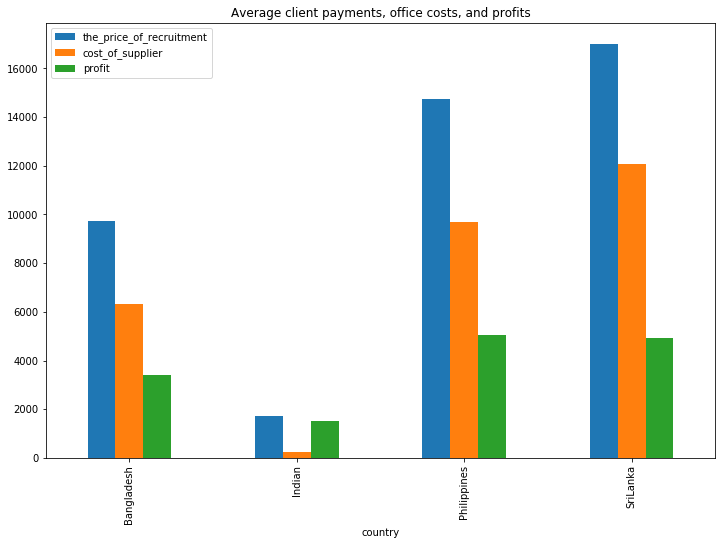

In [230]:
# plot the mean of all columns for all every country
df_mean.plot(kind='bar', figsize=(12, 8))
plt.title('Average client payments, office costs, and profits');
plt.savefig('Average_client_payments_office_costs_and_profits.png')